<a href="https://colab.research.google.com/github/PatrykCiwinski/Topic_modeling_With_NMF/blob/main/Non_negative_matrix_factorization_(topic_modeling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!gdown 1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4

Downloading...
From: https://drive.google.com/uc?id=1iboAP6jwWe0FnhYlz97Q_62Udc2aTNp4
To: /content/bbc_text_cls.csv
100% 5.09M/5.09M [00:00<00:00, 80.2MB/s]


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
import textwrap

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stopwords = set(stopwords.words('english'))

In [19]:
#adding some custom stopwords
stopwords = stopwords.union({'said','would','could','told','also','one','two','mr','new','year'})

In [20]:
df=pd.read_csv('bbc_text_cls.csv')

In [21]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [43]:
def clean_text(headline):
  le=WordNetLemmatizer()
  word_tokens=word_tokenize(headline)
  tokens=[le.lemmatize(w) for w in word_tokens if w not in stopwords and len(w)>3]
  cleaned_text=" ".join(tokens)
  return cleaned_text

In [44]:
df['cleaned_text']=df['text'].apply(clean_text)

In [45]:
df['cleaned_text']

0       sale boost Time Warner profit Quarterly profit...
1       Dollar gain Greenspan speech dollar highest le...
2       Yukos unit buyer face loan claim owner embattl...
3       High fuel price profit British Airways blamed ...
4       Pernod takeover talk lift Domecq Shares drink ...
                              ...                        
2220    program beat dialler scam introducing initiati...
2221    Spam e-mail tempt shopper Computer user across...
2222    careful code European directive software write...
2223    cyber security chief resigns making sure compu...
2224    Losing online gaming Online role playing game ...
Name: cleaned_text, Length: 2225, dtype: object

In [46]:
vectorizer=TfidfVectorizer(max_features=1000)

In [47]:
X = vectorizer.fit_transform(df['cleaned_text'])

In [48]:
#It's not so complicated, cause we know the number of labels (topics)
no_topics=df['labels'].nunique()

In [49]:
nmf =NMF(n_components=no_topics,beta_loss='kullback-leibler',solver='mu',random_state=123)

In [50]:
def wrap(x):
  return textwrap.fill(x, replace_whitespace=False, fix_sentence_endings=True)

In [51]:
Z = nmf.fit_transform(X)

In [52]:
topics = nmf.components_

In [53]:
# Print the topics with their terms
terms = vectorizer.get_feature_names_out()

for index, component in enumerate(topics):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:7]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index+1)+": ",top_terms_list)

Topic 1:  ['company', 'firm', 'market', 'bank', 'price', 'growth', 'sale']
Topic 2:  ['game', 'england', 'club', 'player', 'match', 'team', 'injury']
Topic 3:  ['film', 'award', 'best', 'show', 'star', 'music', 'band']
Topic 4:  ['labour', 'election', 'party', 'government', 'blair', 'minister', 'brown']
Topic 5:  ['mobile', 'technology', 'people', 'phone', 'computer', 'service', 'software']


In [54]:
i = np.random.choice(len(df))
z=Z[i]
topics=np.arange(5)+1

In [55]:
z_df = pd.DataFrame(z)
max_value = z_df.idxmax()

In [56]:
max_idx = max_value.tolist()

In [59]:
pred_topics = {'Topic 1':'business',
'Topic 2':'sports',
'Topic 3':'entertainment',
'Topic 4':'politics',
'Topic 5':'tech'}

In [60]:
values = list(pred_topics.values())

In [61]:
print(wrap(df.iloc[i]['cleaned_text']))

Brown poll campaign move denied government denied report Gordon Brown
preparing oust Alan Milburn Labour election supremo Work pension
minister Alan Johnson wrong suggest chancellor usurp Milburn adding
work team report Sunday Business claimed Brown asked take charge
medium strategy Milburn move behind-the-scenes role Labour always
maintained Brown central campaign role many Labour backbencher
dissatisfied election campaigning gone wanted chancellor take bigger
role Some commentator Tories grasped initiative putting Labour back
foot respond Conservative policy announcement These claim follow
various opinion poll suggest Tories gaining Labour Party strategist
believed want bring Brown centre-stage seen support rise private
polling Budget last week another report Sunday Telegraph claim Milburn
unwilling allow role chancellor come expense Johnson News Gordon Brown
play central role election campaign They wrong Milburn ousting Brown
wrong saying Brown ousting Milburn work team Milburn repe

Text(0.5, 0.98, 'NMF')

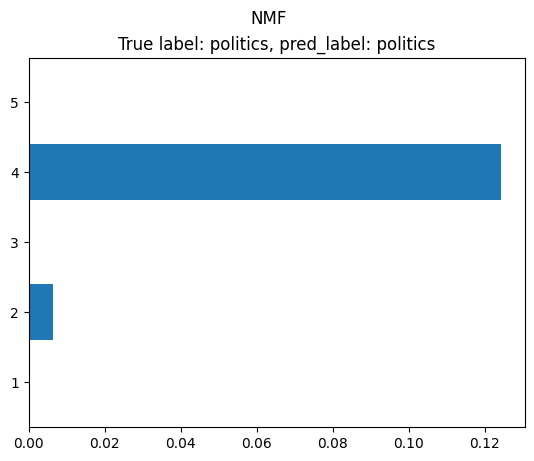

In [64]:
fig,ax= plt.subplots()
ax.barh(topics,z)
ax.set_title(f'True label: {df.iloc[i]["labels"]}, pred_label: {values[max_value[0]]}')
fig.suptitle('NMF')